In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-03,36.325001,35.775002,36.220001,35.875000,57111200.0,33.961651
2017-07-05,36.197498,35.680000,35.922501,36.022499,86278400.0,34.101288
2017-07-06,35.875000,35.602501,35.755001,35.682499,96515200.0,33.779411
2017-07-07,36.187500,35.724998,35.724998,36.044998,76806800.0,34.122574
2017-07-10,36.487499,35.842499,36.027500,36.264999,84362400.0,34.330849
...,...,...,...,...,...,...
2022-06-27,143.490005,140.970001,142.699997,141.660004,70207900.0,141.660004
2022-06-28,143.419998,137.320007,142.130005,137.440002,67083400.0,137.440002
2022-06-29,140.669998,136.669998,137.460007,139.229996,66242400.0,139.229996


In [ ]:
import matplotlib.pyplot as plt

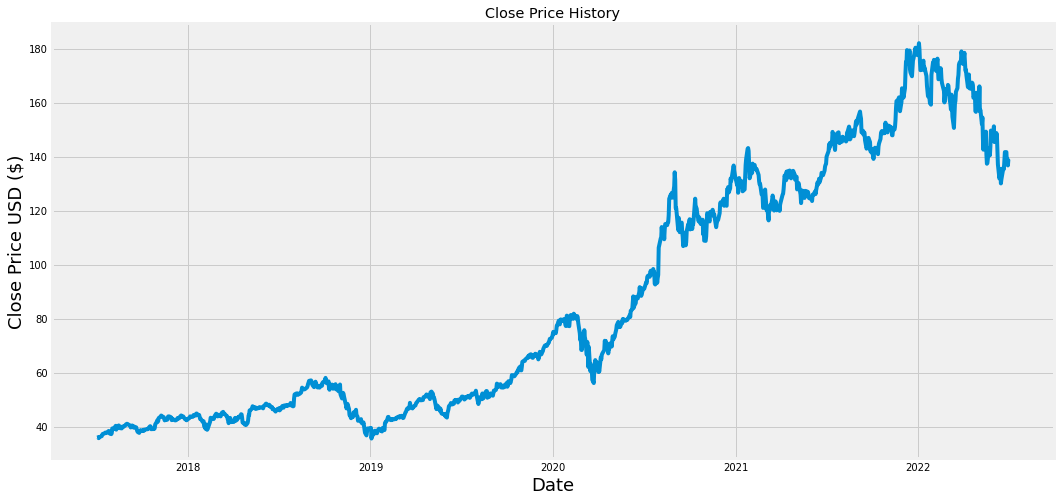

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
import math

In [ ]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)* .8)
training_data_len

1008

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00223606],
       [0.00324314],
       [0.00092173],
       ...,
       [0.70791158],
       [0.69077412],
       [0.70586325]])

In [ ]:
train_data=scaled_data[0:training_data_len , :]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
 x_train.append(train_data[i-60:i, 0])
 y_train.append(train_data[i,0])
 if i<=60:
  print(x_train)
  print(y_train)
  print()

[array([0.00223606, 0.00324314, 0.00092173, 0.00339676, 0.00489886,
       0.00570111, 0.00605958, 0.00952463, 0.0116924 , 0.01258   ,
       0.01346761, 0.01507212, 0.0139114 , 0.01379193, 0.01689851,
       0.01800803, 0.01923701, 0.01428693, 0.01247759, 0.01116326,
       0.01341641, 0.02551847, 0.02283862, 0.02423828, 0.02836903,
       0.03053683, 0.0322096 , 0.02241189, 0.02609882, 0.03014424,
       0.03313136, 0.03202184, 0.02674746, 0.02613297, 0.02563797,
       0.03002475, 0.03036612, 0.02915422, 0.0301613 , 0.03290945,
       0.03536742, 0.03611847, 0.03722796, 0.03731331, 0.03395067,
       0.0336605 , 0.03255098, 0.0280618 , 0.03296065, 0.03186822,
       0.02980284, 0.02746436, 0.03019545, 0.02813006, 0.02823247,
       0.02369208, 0.01911752, 0.01655713, 0.01426987, 0.01869079])]
[0.020551325062514558]



In [ ]:
import numpy as np

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], 60, 1))
x_train.shape

(948, 60, 1)

In [ ]:
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

948/948 [==============================] - 56s 56ms/step - loss: 0.0021


In [ ]:
test_data=scaled_data[training_data_len - 60: , :]
x_test = []
y_test=dataset[training_data_len: , :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.997581937873506

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


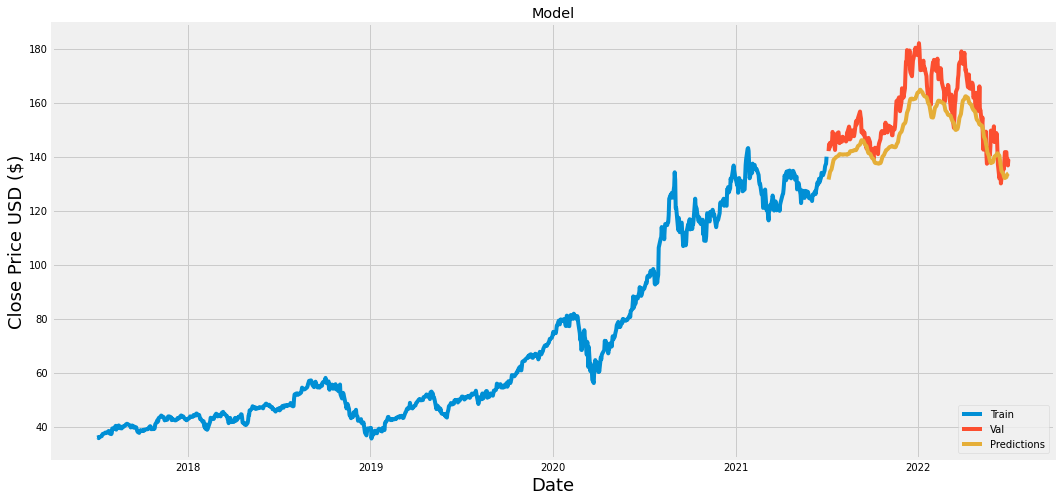

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date' , fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close' , 'Predictions']])
plt.legend(['Train' , 'Val' , 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2021-07-06,142.020004,131.490387
2021-07-07,144.570007,132.340027
2021-07-08,143.240005,133.376984
2021-07-09,145.110001,134.339172
2021-07-12,144.500000,135.312668
...,...,...
2022-06-27,141.660004,132.396896
2022-06-28,137.440002,132.959671
2022-06-29,139.229996,133.317017
